In [419]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.axes._axes as axes

In [420]:
# import the necessary keras packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

##
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from imutils import paths

In [421]:
data_dir = os.getcwd()
amphibians_data = pd.read_csv(f"{data_dir}//dataset.csv",sep=";")

# drop the first column
amphibians_data.drop(axis=0, labels=0, inplace=True)


# add new col names
col_names = ['id', 'motorway', 'water_surface_m2', 'num_reservoir',
             'type_reservoir', 'type_vegetation', 'type1_land_cover',
             'type2_land_cover', 'type3_land_cover', 'reservoir_use',
             'fishing_freq', 'area_access', 'road_dist', 'building_dist',
             'maintenance_status', 'type_shore', 'green_frog', 'brown_frog',
             'common_toad', 'fire_toad', 'tree_frog', 'common_newt',
             'crested_nest']

amphibians_data.columns = col_names

# drop the cols id and motorway that arent used for learning
amphibians_data.drop(axis=1, labels=['id', 'motorway'], inplace=True)

amphibians_data.head()

,water_surface_m2,num_reservoir,type_reservoir,type_vegetation,type1_land_cover,type2_land_cover,type3_land_cover,reservoir_use,fishing_freq,area_access,...,building_dist,maintenance_status,type_shore,green_frog,brown_frog,common_toad,fire_toad,tree_frog,common_newt,crested_nest
1,600,1,1,4,6,2,10,0,0,50,...,0,0,1,0,0,0,0,0,0,0
2,700,1,5,1,10,6,10,3,1,75,...,1,0,1,0,1,1,0,0,1,0
3,200,1,5,1,10,6,10,3,4,75,...,1,0,1,0,1,1,0,0,1,0
4,300,1,5,0,6,10,2,3,4,25,...,0,0,1,0,0,1,0,0,0,0
5,600,2,1,4,10,2,6,0,0,99,...,5,0,1,0,1,1,1,0,1,1


In [422]:
# check the info for the data types and null values of the cols
amphibians_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 189
Data columns (total 21 columns):
water_surface_m2      189 non-null object
num_reservoir         189 non-null object
type_reservoir        189 non-null object
type_vegetation       189 non-null object
type1_land_cover      189 non-null object
type2_land_cover      189 non-null object
type3_land_cover      189 non-null object
reservoir_use         189 non-null object
fishing_freq          189 non-null object
area_access           189 non-null object
road_dist             189 non-null object
building_dist         189 non-null object
maintenance_status    189 non-null object
type_shore            189 non-null object
green_frog            189 non-null object
brown_frog            189 non-null object
common_toad           189 non-null object
fire_toad             189 non-null object
tree_frog             189 non-null object
common_newt           189 non-null object
crested_nest          189 non-null object
dtypes: objec

In [423]:
# double check using descrbe
amphibians_data.describe()

,water_surface_m2,num_reservoir,type_reservoir,type_vegetation,type1_land_cover,type2_land_cover,type3_land_cover,reservoir_use,fishing_freq,area_access,...,building_dist,maintenance_status,type_shore,green_frog,brown_frog,common_toad,fire_toad,tree_frog,common_newt,crested_nest
count,189,189,189,189,189,189,189,189,189,189,...,189,189,189,189,189,189,189,189,189,189
unique,66,10,8,5,8,7,8,3,5,6,...,6,3,2,2,2,2,2,2,2,2
top,300,1,1,1,2,10,6,0,0,100,...,1,0,1,1,1,1,0,0,0,0
freq,47,148,116,55,70,44,55,130,125,141,...,62,184,186,108,148,124,131,118,131,168


In [424]:
# convert the numerical and ordinal cols to numerical and keep the categoricals
# as objects
numeric_cols_nos = [0, 1, 9, 10, 11]
for col_no, col_name in enumerate(amphibians_data.columns):
    if col_no in numeric_cols_nos:
        amphibians_data[col_name] = amphibians_data[col_name].astype(np.float32)

# after finishing look at the info
amphibians_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 189
Data columns (total 21 columns):
water_surface_m2      189 non-null float32
num_reservoir         189 non-null float32
type_reservoir        189 non-null object
type_vegetation       189 non-null object
type1_land_cover      189 non-null object
type2_land_cover      189 non-null object
type3_land_cover      189 non-null object
reservoir_use         189 non-null object
fishing_freq          189 non-null object
area_access           189 non-null float32
road_dist             189 non-null float32
building_dist         189 non-null float32
maintenance_status    189 non-null object
type_shore            189 non-null object
green_frog            189 non-null object
brown_frog            189 non-null object
common_toad           189 non-null object
fire_toad             189 non-null object
tree_frog             189 non-null object
common_newt           189 non-null object
crested_nest          189 non-null object
dtypes: 

In [425]:
# at this point separate the targets and the features
targets = amphibians_data.columns[-7:]
X = amphibians_data[amphibians_data.columns[~amphibians_data.columns.isin(targets)]]
Y = amphibians_data[targets].astype(np.float32)

In [426]:
# these are the numerical or ordinal cols
cols_to_standardise = [col_name
                       for col_name in amphibians_data.columns
                       if amphibians_data[col_name].dtype == np.float32 ]

# these are the categorical cols
cols_to_encode = \
    amphibians_data.columns[~amphibians_data.columns.isin(cols_to_standardise)
                            & ~amphibians_data.columns.isin(Y.columns)]
cols_to_encode = list(cols_to_encode)

In [427]:


# instantiate the transoformers
scaler = StandardScaler()
ohe = OneHotEncoder()

# chain the column transformer
ct = make_column_transformer(
    (scaler, cols_to_standardise),
    (ohe, cols_to_encode),
    remainder="passthrough"
)

# # create the pipeline object
# pipe_model = make_pipeline([
#     ('standardise_onehot', ct),
#     ('')
# ])

In [428]:
# transform all the features
X_transformed = ct.fit_transform(X).toarray()

In [429]:
# now do the data split for training process
trainx, testx, trainy, testy = train_test_split(X_transformed,
                                                Y.to_numpy(),
                                                test_size=0.3,
                                                random_state=42)

In [430]:
def create_model(first_layer_size=256,
                 multilabel_size=trainy.shape[1],
                 stop_at = 256):

    # create the nodes list
    nodes = []
    while first_layer_size % 2 == 0:
        nodes.append(int(first_layer_size))
        first_layer_size /= 2

    # create a model
    model = Sequential()
    for node in nodes:
        if node >= stop_at:
                model.add(Dense(units=node, input_shape=(trainx.shape[1], )))
                model.add(Activation("relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.25))

    model.add(Dense(units=multilabel_size))
    model.add(Activation("sigmoid"))
    return model

In [431]:
model = create_model(first_layer_size=512, stop_at=256)
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_227 (Dense)            (None, 512)               28160     
_________________________________________________________________
activation_227 (Activation)  (None, 512)               0         
_________________________________________________________________
batch_normalization_131 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_121 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_228 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_228 (Activation)  (None, 256)               0         
_________________________________________________________________
batch_normalization_132 (Bat (None, 256)             

In [432]:
# create our custom accuracy score
def multilabel_accuracy(y_true, y_pred: tf.Tensor):


    preds_binarised = tf.where(y_pred >= 0.5, 1.0, 0.0)

    temp1 = y_true == preds_binarised
    temp2 = tf.where(temp1 == True, 1.0, 0.0)

    sum_array = K.sum(temp2, axis=1)
    all_correct_rows = tf.where(sum_array == 7, 1.0, 0.0)
    multilabel_accuracy_ = K.mean(all_correct_rows)

    return multilabel_accuracy_



In [433]:
# init some global variables
epochs = 60
init_lr = 1e-3


# compile the model and start training
opt = Adam(learning_rate=init_lr, decay=init_lr/epochs)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy', multilabel_accuracy])

H = model.fit(trainx, trainy,
              validation_data=(testx, testy),
              verbose=1,
              epochs=epochs)

Train on 132 samples, validate on 57 samples
Epoch 1/60
132/132 [==============================] - 2s 13ms/sample - loss: 0.8983 - accuracy: 0.5260 - multilabel_accuracy: 0.0000e+00 - val_loss: 0.6971 - val_accuracy: 0.4762 - val_multilabel_accuracy: 0.0200
Epoch 2/60
132/132 [==============================] - 0s 423us/sample - loss: 0.7055 - accuracy: 0.6494 - multilabel_accuracy: 0.0437 - val_loss: 0.6844 - val_accuracy: 0.5940 - val_multilabel_accuracy: 0.0000e+00
Epoch 3/60
132/132 [==============================] - 0s 363us/sample - loss: 0.5942 - accuracy: 0.6991 - multilabel_accuracy: 0.0688 - val_loss: 0.6774 - val_accuracy: 0.5890 - val_multilabel_accuracy: 0.0000e+00
Epoch 4/60
132/132 [==============================] - 0s 310us/sample - loss: 0.5362 - accuracy: 0.7197 - multilabel_accuracy: 0.0750 - val_loss: 0.6696 - val_accuracy: 0.6140 - val_multilabel_accuracy: 0.0000e+00

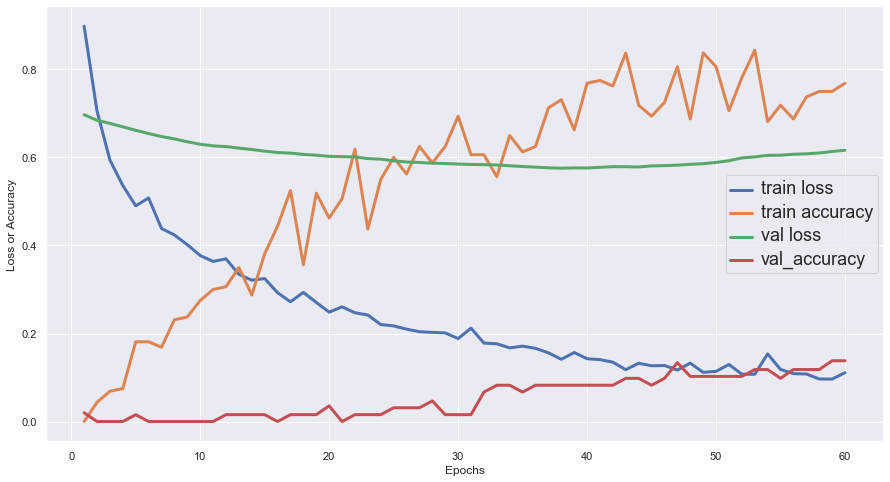

In [434]:
# evaluate the network
# print ( "[INFO] evaluating network..." )
# predictions = model.predict(testx)
# print (classification_report(testy.argmax(axis=1 ),
# predictions.argmax(axis=1 ), target_names=classNames))


# plot the performance
epoch_num = range(1,epochs+1)
loss = H.history['loss']
accuracy = H.history['multilabel_accuracy']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_multilabel_accuracy']
plot_df = pd.DataFrame(data=np.c_[epoch_num,
                                  loss,accuracy,
                                  val_loss,
                                  val_accuracy],
                       columns=['epochs','loss', 'accuracy', 'val_loss', 'val_accuracy'])

# do the actual plots
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

In [435]:
H.history['val_multilabel_accuracy']

[0.02,
 0.0,
 0.0,
 0.0,
 0.015625,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.015625,
 0.015625,
 0.015625,
 0.015625,
 0.0,
 0.015625,
 0.015625,
 0.015625,
 0.035625,
 0.0,
 0.015625,
 0.015625,
 0.015625,
 0.03125,
 0.03125,
 0.03125,
 0.046875,
 0.015625,
 0.015625,
 0.015625,
 0.066874996,
 0.082499996,
 0.082499996,
 0.066874996,
 0.082499996,
 0.082499996,
 0.082499996,
 0.082499996,
 0.082499996,
 0.082499996,
 0.082499996,
 0.098124996,
 0.098124996,
 0.082499996,
 0.098124996,
 0.13374999,
 0.1025,
 0.1025,
 0.1025,
 0.1025,
 0.1025,
 0.118125,
 0.118125,
 0.098124996,
 0.118125,
 0.118125,
 0.118125,
 0.138125,
 0.138125]